# Tech Challenge 04 - Machine Learning Engineering

Desafio de criar um modelo preditivo de redes neurais Long Short Term Memory (LSTM) para predizer o valor de fechamento da bolsa de valores de uma empresa à sua escolha e realizar toda a pipeline de desenvolvimento, desde a criação do modelo preditivo até o deploy do modelo em uma API que permita a previsão de preços de ações.

Para mais informações para obter os dados e execução das APIs basta acessar o [Link do Github](https://github.com/claudio-pandolfi/tc04-fiap)

### Instalação das dependências

In [2]:
pip install matplotlib requests

   ---------------------------------------- 0.0/64.7 kB ? eta -:--:--
   ---------------------------------------- 64.7/64.7 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
   ---------------------------------------- 159.4/159.4 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/107.0 kB ? eta -:--:--
   ---------------------------------------- 107.0/107.0 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/71.0 kB ? eta -:--:--
   ---------------------------------------- 71.0/71.0 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/131.1 kB ? eta -:--:--
   ---------------------------------------- 131.1/131.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\crp_r\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Importar bibliotecas

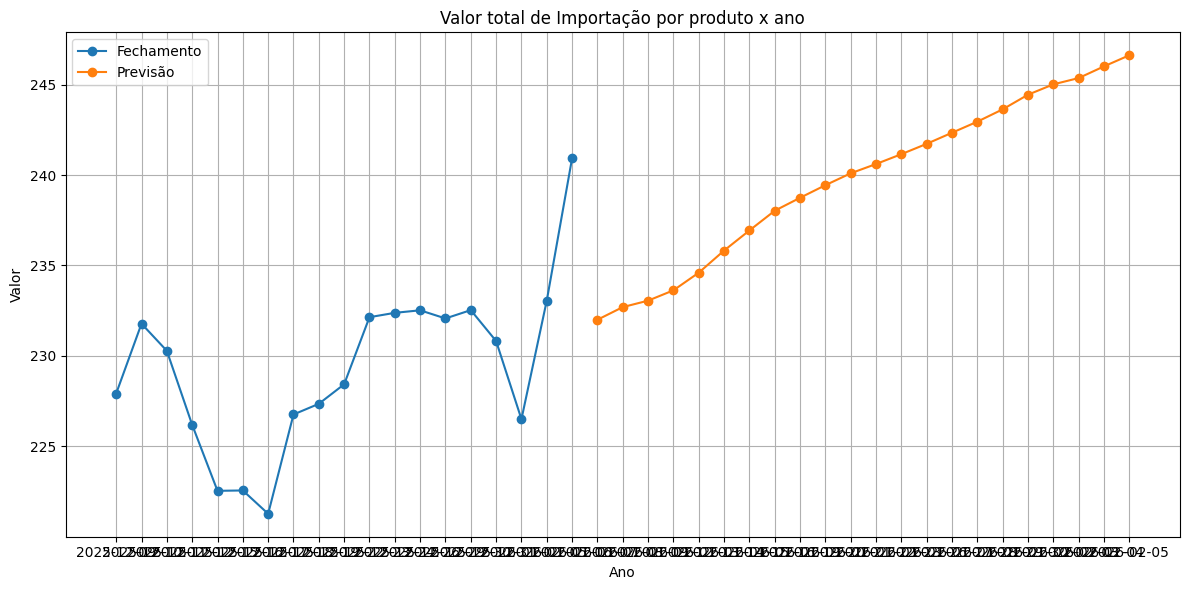

In [4]:
import matplotlib.pyplot as plt

import requests

# URL of the API
url = "http://localhost:5000/auth?username=test&password=test"

response = requests.get(url)

dataAuth = response.json()
params = {
    "symbol": "AMZN",
    "days": 30
}

url = "http://localhost:5000/lstm/predict"

headers = {
    "Authorization": f'Bearer {dataAuth["access_token"]}'
}
response = requests.get(url, headers=headers, params=params)

dataRequest = response.json()

predictions = dataRequest['predictions']
features = dataRequest['features']
plt.figure(figsize=(12, 6))

plt.plot(features['dates'], [feature[0] for feature in features['values']], label='Fechamento', marker='o')
plt.plot(predictions['dates'], [prediction[0] for prediction in predictions['values']], label='Previsão', marker='o')

plt.title('Valor total de Importação por produto x ano')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
